# Lab 5: Numerical Prediction in R

In [21]:
#Install and Load the following packages.

# If you are on MyBinder, run the following lines

# install.packages("GGally")
# install.packages("labelVector")
# install.packages("tidyverse")

# otherwise you can install them in Anaconda Navigator

In [22]:
library(GGally)
library(caret)
library(rpart.plot)
library(gridExtra)
library(labelVector)
library(tidyverse)

Numeric Prediction in R
- Prediction task: Predict **prices** of Toyota Corollas
- We use the dataset `ToyotaCorolla.csv`

In [23]:
#Load the dataset ToyotaCorolla
df <- read.csv("ToyotaCorolla.csv")

# note: df is a common name stands for Data Frame. But it's just a name, you can use whatever you want.
# be careful of using name "data", as that is a built-in function and you may override it

In [24]:
#Take a look at the data
summary(df)

     Price            Age              KM               HP       
 Min.   : 4350   Min.   : 1.00   Min.   :     1   Min.   : 69.0  
 1st Qu.: 8450   1st Qu.:44.00   1st Qu.: 43000   1st Qu.: 90.0  
 Median : 9900   Median :61.00   Median : 63390   Median :110.0  
 Mean   :10731   Mean   :55.95   Mean   : 68533   Mean   :101.5  
 3rd Qu.:11950   3rd Qu.:70.00   3rd Qu.: 87021   3rd Qu.:110.0  
 Max.   :32500   Max.   :80.00   Max.   :243000   Max.   :192.0  
    MetColor        Automatic             CC           Doors      
 Min.   :0.0000   Min.   :0.00000   Min.   :1300   Min.   :2.000  
 1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:1400   1st Qu.:3.000  
 Median :1.0000   Median :0.00000   Median :1600   Median :4.000  
 Mean   :0.6748   Mean   :0.05571   Mean   :1567   Mean   :4.033  
 3rd Qu.:1.0000   3rd Qu.:0.00000   3rd Qu.:1600   3rd Qu.:5.000  
 Max.   :1.0000   Max.   :1.00000   Max.   :2000   Max.   :5.000  
     Weight      Fuel_Diesel    
 Min.   :1000   Min.   :0.0000  
 1s

## Preparation

It's a good idea to first look at the distribution of our outcome variable. Remember the assumption for linear regressions?

- Normally distributed
- Linear relationships

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 2 rows containing missing values (geom_bar).”


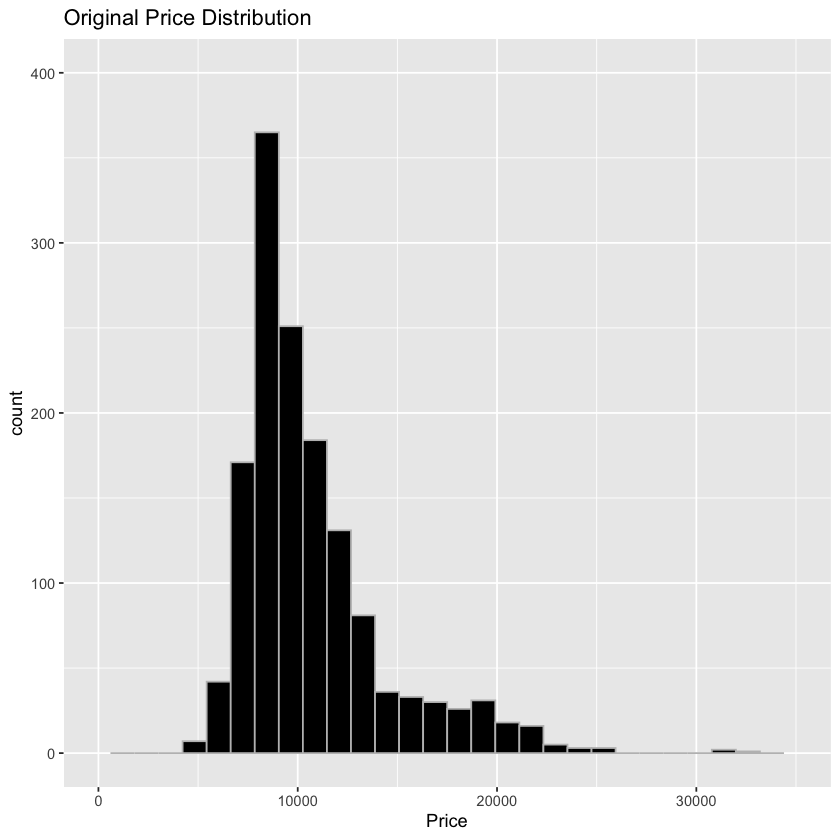

In [25]:
#Let us check the distribution of Price
ggplot(data=df, aes(x = Price)) + 
        geom_histogram(colour = "grey", fill = "black") +
        xlim (0,35000) + 
        ylim (0,400) + 
        ggtitle("Original Price Distribution") +
        labs(x = "Price")

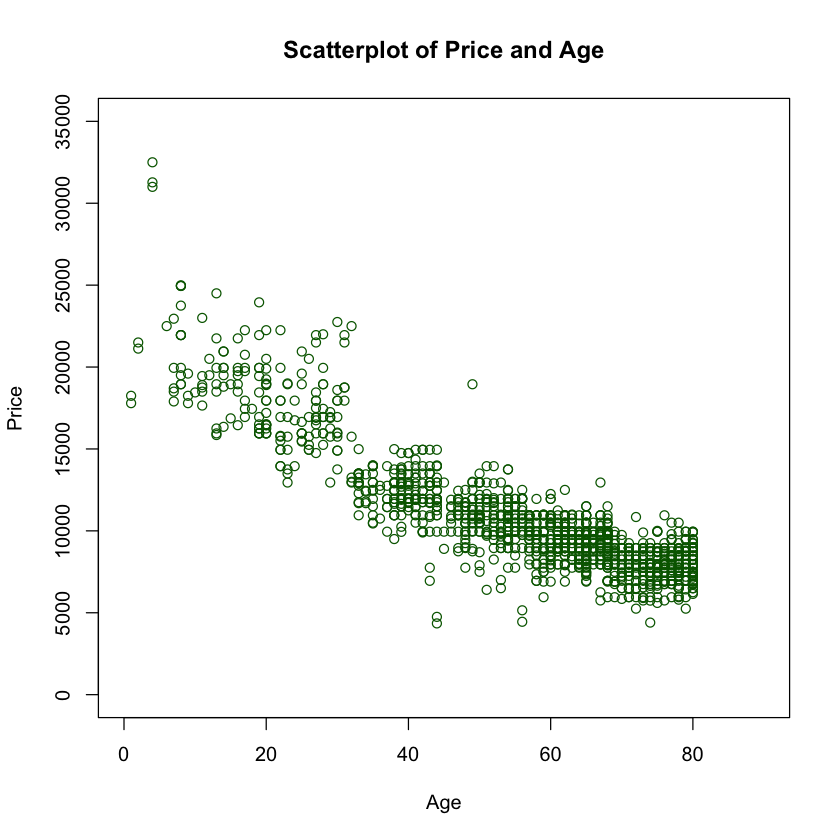

In [26]:
#Let us check relationship among attributes
#We can use scatterplots
plot(df$Age, df$Price, col = "darkgreen", 
     xlim = c(0, 90), ylim = c(0, 35000), ylab = "Price", 
     xlab = "Age", main = "Scatterplot of Price and Age")

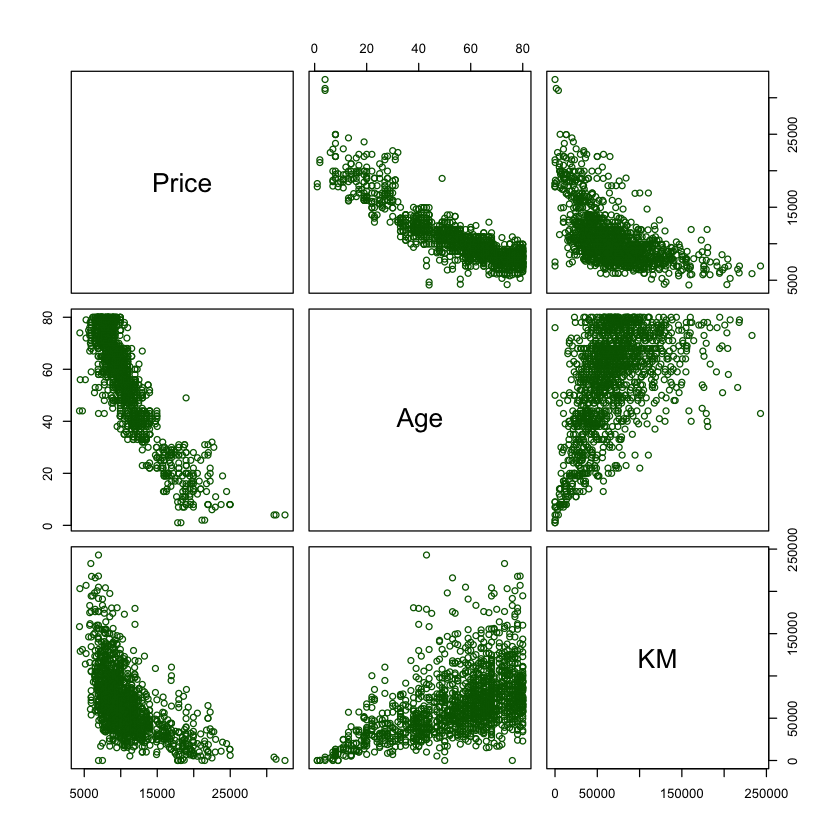

In [27]:
#A more efficient way to see relatioships among multiple attributes at a time
#is using the pairs function
pairs(df[,1:3], col = "darkgreen")

## Generate Training and Testing Dataset

In [28]:
#Prepare the data for prediction
#Split the data into training and testing
trainRows <- createDataPartition(y = df$Price, p = 0.7, list = FALSE)

train_set <- df[trainRows,]
test_set <- df[-trainRows,]

# Normalization?

For k-NN, we need to standardize / normalize the data. But this is not required for regression trees and linear regressions.

In [29]:
#Standardize the data - do not standardize the Y
#First, create a copy of the datasets
train_set_stand <- train_set
test_set_stand <- test_set

In [30]:
library(standardize)

In [31]:
#Apply the standardization
train_set_stand[,2:10] <- apply(train_set_stand[,2:10], MARGIN = 2, FUN = scale)
test_set_stand[,2:10] <- apply(test_set_stand[,2:10], MARGIN = 2, FUN = scale)

# k-NN

Train k-NN using the function `train()` and specifying as method `knn`
the algorithm will look at the outcome variable and understand whether 
it is a classification or a numerical prediction task.

Remember, we run knn using the standardized data.

In [32]:
knn_model <- train(Price~., train_set_stand, method = "knn")
knn_model 

k-Nearest Neighbors 

1007 samples
   9 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 1007, 1007, 1007, 1007, 1007, 1007, ... 
Resampling results across tuning parameters:

  k  RMSE      Rsquared   MAE     
  5  1501.026  0.8335063  1062.407
  7  1467.072  0.8412959  1030.658
  9  1471.330  0.8424984  1021.472

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was k = 7.

In [33]:
#Get the predictions from the knn_model
knnPred <- predict(knn_model, test_set_stand)

## Examining Predicted Distribution

In [34]:
#Get a histogram of the predicted prices. If you assign the the ggplot output to a variable, it will not be displayed
h_pred_knn <- ggplot(data= test_set_stand, aes(x = knnPred)) + 
        geom_histogram(colour = "lightblue", fill = "darkblue") +
        xlim (0,35000) + 
        ylim (0,200) + 
        ggtitle("KNN, Distribution of Predicted Price") +
        labs(x = "Predicted Price")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 2 rows containing missing values (geom_bar).”


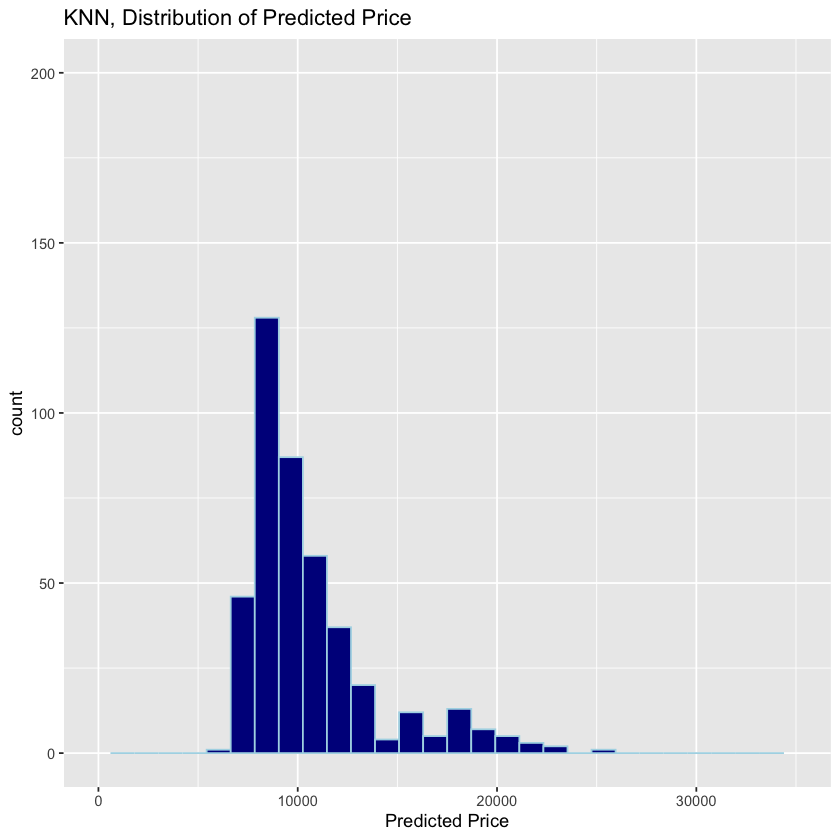

In [35]:
h_pred_knn # you can display it by evaluating the varialbe

In [36]:
# Store the histogram of the original price distribution
price_dist <- ggplot(data=test_set_stand, aes(x = Price)) + 
        geom_histogram(colour = "grey", fill = "black") +
        xlim (0,35000) + 
        ylim (0,200) + 
        ggtitle("Original Price Distribution") +
        labs(x = "Price")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 2 rows containing missing values (geom_bar).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 2 rows containing missing values (geom_bar).”


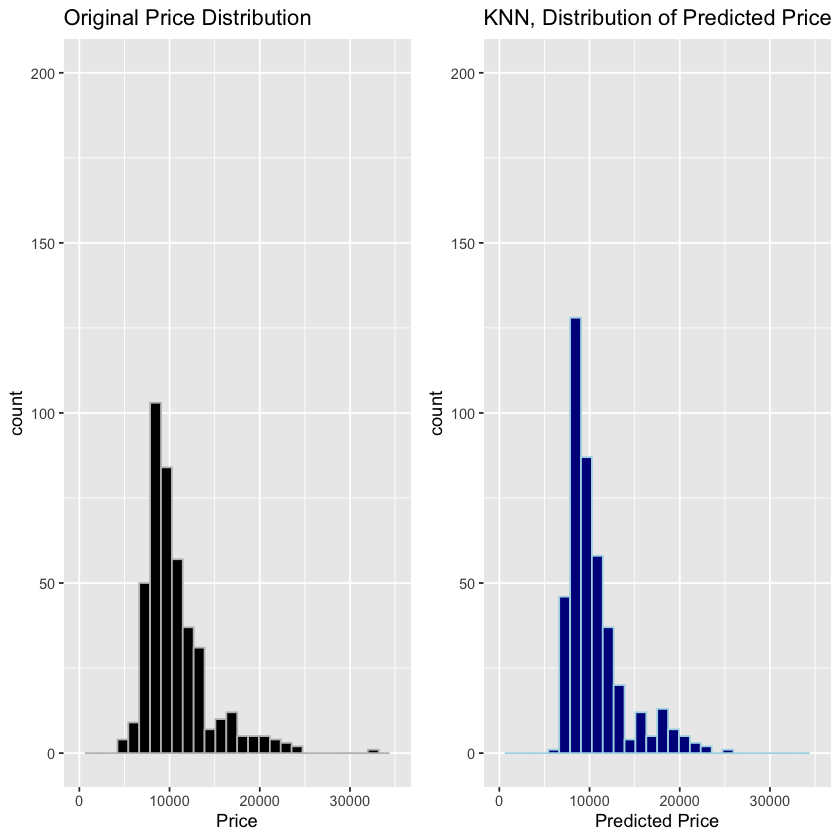

In [37]:
grid.arrange(price_dist, h_pred_knn, nrow = 1) # compare them side-by-side

## Error Metrics

First let's have a visual representation of the errors.

In [38]:
# Compute the prediction error
knn_error <- knnPred - test_set_stand$Price

In [77]:
#Visualize the prediction error
#Histogram of the distribution of the prediction error
h_error_knn <- ggplot(data= test_set_stand, aes(x = knn_error)) + 
        geom_histogram(colour = "lightblue", fill = "blue") +
        xlim (-10000, 10000) + 
        ylim (0, 150) + 
        ggtitle("KNN, Distribution of Prediction Error") +
        labs(x = "Prediction Error")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”


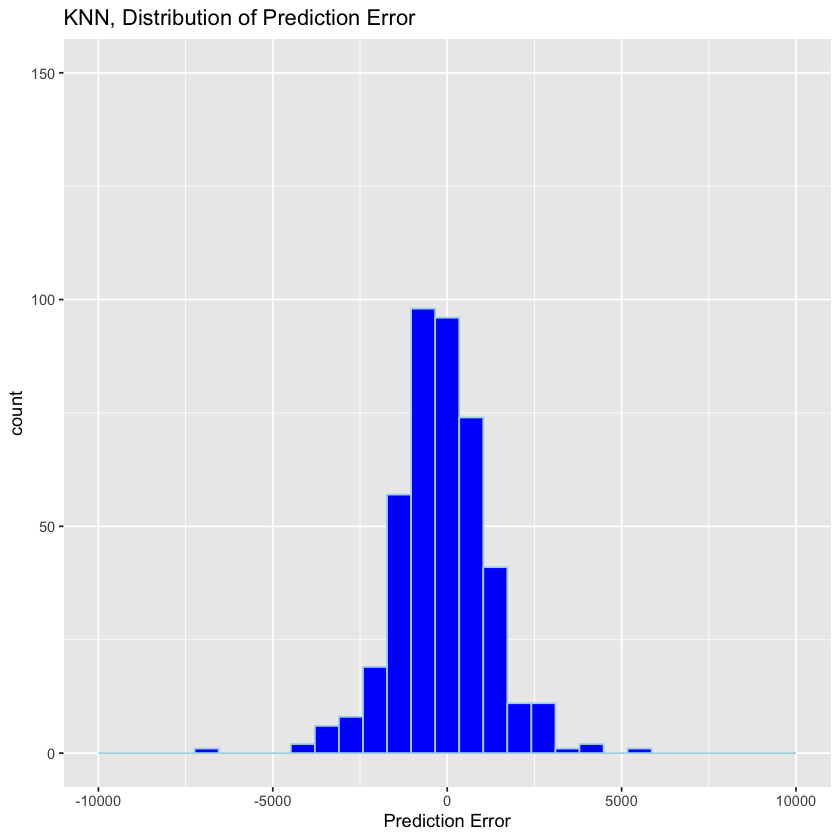

In [78]:
h_error_knn

Scatter plot of prediction error and price. It seems like higher price cars tend to be under-predicted, and lower priced cars tend to be over-predicting. (Why?)

This is because of the nature of K-NN: tendency to predict the average.

Warning message:
“Removed 2 rows containing missing values (geom_point).”


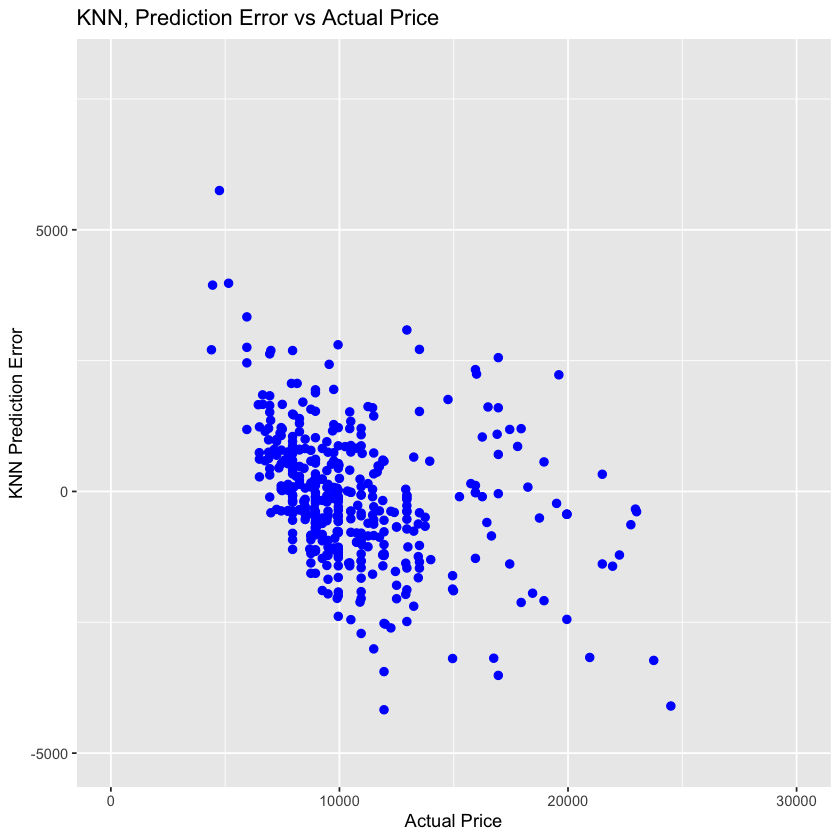

In [40]:
#Plot prediction error vs actual price
ggplot(data = test_set_stand, aes(x=Price, y=knn_error)) +
        geom_point(size=2, color = "blue") +
        ylim (-5000, 8000) +
        xlim (0, 30000) +
        ggtitle("KNN, Prediction Error vs Actual Price") +
        labs(x = "Actual Price", y = "KNN Prediction Error")

### Calculating the Metrics

**Average (mean) error**: take the mean of the prediction error

In [41]:
knnME <- mean(knn_error)
knnME

[1] -103.4882

**MAE - Mean absolute error**: use th MAE function

In [42]:
knnMAE <- MAE(pred = knnPred, obs = test_set_stand$Price)
knnMAE

[1] 994.713

**MAPE - Mean absolute % error**

First, take the absolute value of the ratio between error and actual value. Then take the average and times 100.

In [43]:
#First, take the absolute value of the ratio between error and actual value
knn_abs_relative_error <-abs(knn_error/test_set_stand$Price)
#Then take the average and * by 100
knnMAPE <- mean(knn_abs_relative_error)*100
knnMAPE

[1] 10.12233

**RMSE - Root mean square error**: use the `RMSE` function


In [44]:
knnRMSE<- RMSE(pred = knnPred, obs = test_set_stand$Price)
knnRMSE

[1] 1390.954

Put together the error measures into a "named list" `res_knn`. We will use this variable later.

In [45]:
res_knn<- c(knnME, knnMAE, knnMAPE, knnRMSE)
names(res_knn) <-c("ME", "MAE", "MAPE", "RMSE")
res_knn <- set_label(res_knn, "KNN")
res_knn

KNN
        ME        MAE       MAPE       RMSE 
-103.48818  994.71295   10.12233 1390.95410

In [46]:
res_knn["ME"] # later we can access this number conveniently

KNN
       ME 
-103.4882

# Regression Tree

We don't need to standardize the data for regression trees.

In [47]:
#Train regression tree; use the non standardized data
rtree <- train(Price~., train_set, method = "rpart")
rtree

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


CART 

1007 samples
   9 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 1007, 1007, 1007, 1007, 1007, 1007, ... 
Resampling results across tuning parameters:

  cp          RMSE      Rsquared   MAE     
  0.03046591  1695.321  0.7857114  1251.346
  0.11850178  1933.658  0.7137019  1459.907
  0.66798334  2926.836  0.6325173  2189.603

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.03046591.

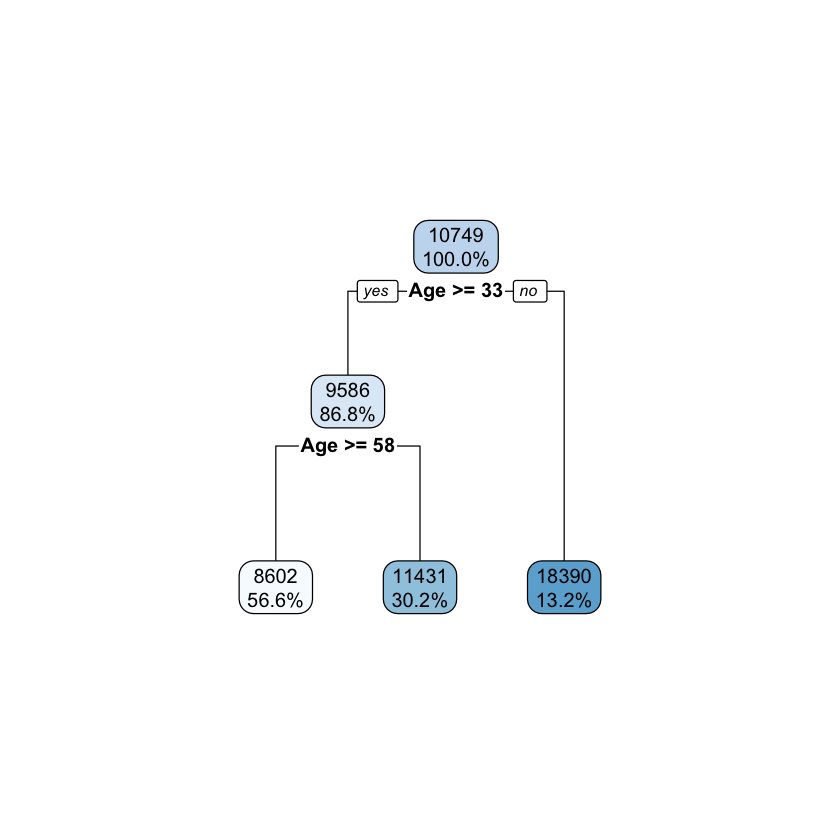

In [48]:
#Plot the tree
rpart.plot(rtree$finalModel, digits=-3)

In [49]:
#Get predictions using the testing data
treePred <- predict(rtree, test_set)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 2 rows containing missing values (geom_bar).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 2 rows containing missing values (geom_bar).”


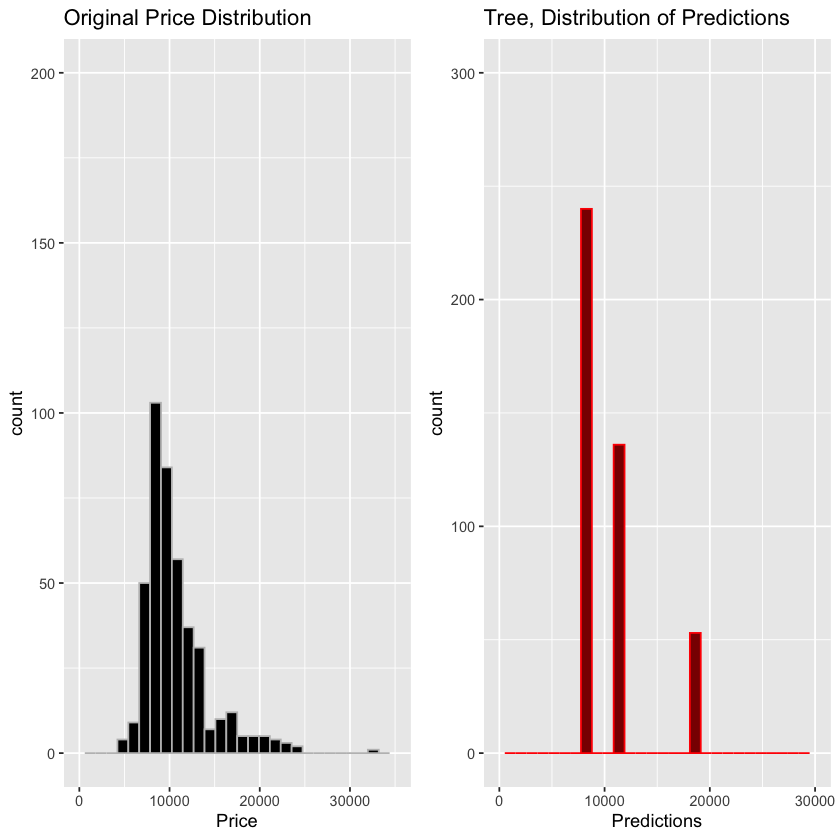

In [50]:
#Get a histogram of the predicted prices
h_pred_tree<- ggplot(data= test_set, aes(x = treePred)) + 
        geom_histogram(colour = "red", fill = "darkred") +
        xlim (0,30000) + 
        ylim (0, 300) + 
        ggtitle("Tree, Distribution of Predictions") +
        labs(x = "Predictions")

#compare to the actual price distribution we created above
grid.arrange(price_dist,h_pred_tree, nrow=1)

Question: what could be an interesting observation by comparing the histogram above?

Answer: The number of bars in the histogram corresponds with the leaf node of the regression trees. So regression tree tends to discretize the data.

## Error Metrics

In [51]:
#Prediction error
tree_error <- treePred - test_set$Price

In [52]:
#Visualize prediction error
#Histogram of the distribution of prediction error
h_error_tree<- ggplot(data= test_set, aes(x = tree_error)) + 
        geom_histogram(colour = "darkred", fill = "red") +
        xlim (-10000, 10000) + 
        ylim (0, 150) + 
        ggtitle("Tree, Distribution of Prediction Error") +
        labs(x = "Prediction Error")

In [53]:
#Plot prediction error vs actual price
p_error_tree<- ggplot(data = test_set, aes(x=Price, y=tree_error)) +
        geom_point(size=2, color = "red") +
        ylim (-5000, 8000) +
        xlim (0, 30000) +
        ggtitle("Tree, Prediction Error vs Actual Price") +
        labs(x = "Actual Price", y = "Tree Prediction Error")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 3 rows containing missing values (geom_point).”


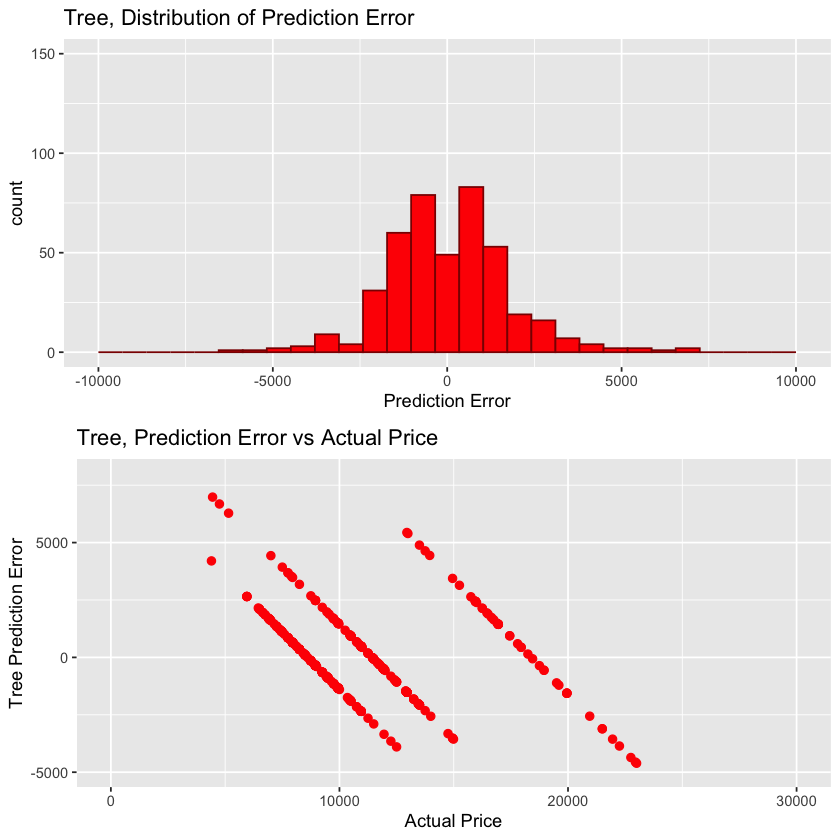

In [54]:
grid.arrange(h_error_tree, p_error_tree)

In [55]:
#Mean error
ME_tree <- mean(tree_error)
#MAE
treeMAE <- MAE(pred = treePred, obs = test_set$Price)
#MAPE
tree_abs_relative_error <- abs(tree_error / test_set$Price)
treeMAPE <- mean(tree_abs_relative_error) * 100
#RMSE
treeRMSE <- RMSE(pred = treePred, obs = test_set$Price)

In [56]:
#Put together the performance measures
res_tree<- c(ME_tree, treeMAE, treeMAPE, treeRMSE)
names(res_tree) <-c("ME", "MAE", "MAPE", "RMSE")
res_tree <- set_label(res_tree, "Regression Tree")
res_tree

Regression Tree
        ME        MAE       MAPE       RMSE 
  19.87433 1338.76371   13.28735 1861.19783

# Linear Regression
Check whether assumptions seem to hold:

- we had already looked at the distribution of the outcome variable, price and at scatterplots of price with other attributes
- we need to check at the correlation between attributes to see if there is a collinearity problem

Use the `cor` function:

Default method is the Pearson coefficient: from -1 to 1. Close to zero means low correlation. 1 means perfect correlation (which is a problem if two variables are perfectly correlated).

In [57]:
cor(df[,c(2:10)])

,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,Fuel_Diesel
Age,1.00000000,0.50567218,-0.15662202,-0.10814958,0.03171677,-0.13318154,-0.14835921,-0.47025318,-0.09774041
KM,0.50567218,1.00000000,-0.33353795,-0.08050293,-0.08185408,0.30215036,-0.03619661,-0.02859846,0.40305992
HP,-0.15662202,-0.33353795,1.00000000,0.05871170,0.01314403,0.05088370,0.09242450,0.08961406,-0.53345310
MetColor,-0.10814958,-0.08050293,0.05871170,1.00000000,-0.01933545,0.03492137,0.08524283,0.05792883,-0.01242031
Automatic,0.03171677,-0.08185408,0.01314403,-0.01933545,1.00000000,-0.06932134,-0.02765382,0.05724851,-0.08449022
CC,-0.13318154,0.30215036,0.05088370,0.03492137,-0.06932134,1.00000000,0.12676764,0.65144958,0.76166682
Doors,-0.14835921,-0.03619661,0.09242450,0.08524283,-0.02765382,0.12676764,1.00000000,0.30261764,0.02549471
Weight,-0.47025318,-0.02859846,0.08961406,0.05792883,0.05724851,0.65144958,0.30261764,1.00000000,0.56808687
Fuel_Diesel,-0.09774041,0.40305992,-0.53345310,-0.01242031,-0.08449022,0.76166682,0.02549471,0.56808687,1.00000000


In this case, we exclude CC, that is heavily correlated with Weight (0.65144958) and Fuel_Diesel (0.76166682)

To make things easier when we train the linear regression, we can create copy of the data that excludes the attributes we do not want to include.

In [58]:
#use the not normalized data
#exclude attributes that are collinear

train_set_lr <- train_set %>% select(1:6, 8:10)
test_set_lr <- test_set %>% select(1:6, 8:10)

Use the `train()` function with `method = "lm"` to train a linear model.

In [59]:
#train the linear regression
#use "lm" as method
#use the dataset we just created
lin_reg <- train(Price~., train_set_lr, method = "lm")
lin_reg

Linear Regression 

1007 samples
   8 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 1007, 1007, 1007, 1007, 1007, 1007, ... 
Resampling results:

  RMSE      Rsquared   MAE    
  1369.024  0.8653634  1001.83

Tuning parameter 'intercept' was held constant at a value of TRUE

In [60]:
#Summarize final model
fit <- lin_reg$finalModel

In [61]:
#Look at the coefficients of the linear regression
options(scipen = 999) #this is to avoid scientific notation
summary(fit)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-9720.8  -786.6   -39.4   819.0  6133.3 

Coefficients:
                Estimate   Std. Error t value             Pr(>|t|)    
(Intercept) -3314.145143  1281.116398  -2.587              0.00982 ** 
Age          -125.069485     3.055617 -40.931 < 0.0000000000000002 ***
KM             -0.019086     0.001502 -12.709 < 0.0000000000000002 ***
HP             29.114106     3.887673   7.489    0.000000000000153 ***
MetColor       57.046765    90.838688   0.628              0.53015    
Automatic     280.181658   180.648604   1.551              0.12122    
Doors         -12.096704    47.119083  -0.257              0.79744    
Weight         18.083283     1.318778  13.712 < 0.0000000000000002 ***
Fuel_Diesel     6.562379   257.342032   0.026              0.97966    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1316 on 998 degrees of freedom
Multiple R-

In [62]:
#Get predictions using the testing data for the linear regression
lin_pred <- predict(lin_reg, newdata = test_set_lr)

In [63]:
#Visualize the predictions
#Create a histogram for the distribution of predicted prices
h_pred_lm <- ggplot(data= test_set_lr, aes(x = lin_pred)) + 
        geom_histogram(colour = "seagreen", fill = "darkgreen") +
        xlim (0,30000) + 
        ylim (0, 200) + 
        ggtitle("Linear Reg., Distribution of Predictions") +
        labs(x = "Predicted Price")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 2 rows containing missing values (geom_bar).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 2 rows containing missing values (geom_bar).”


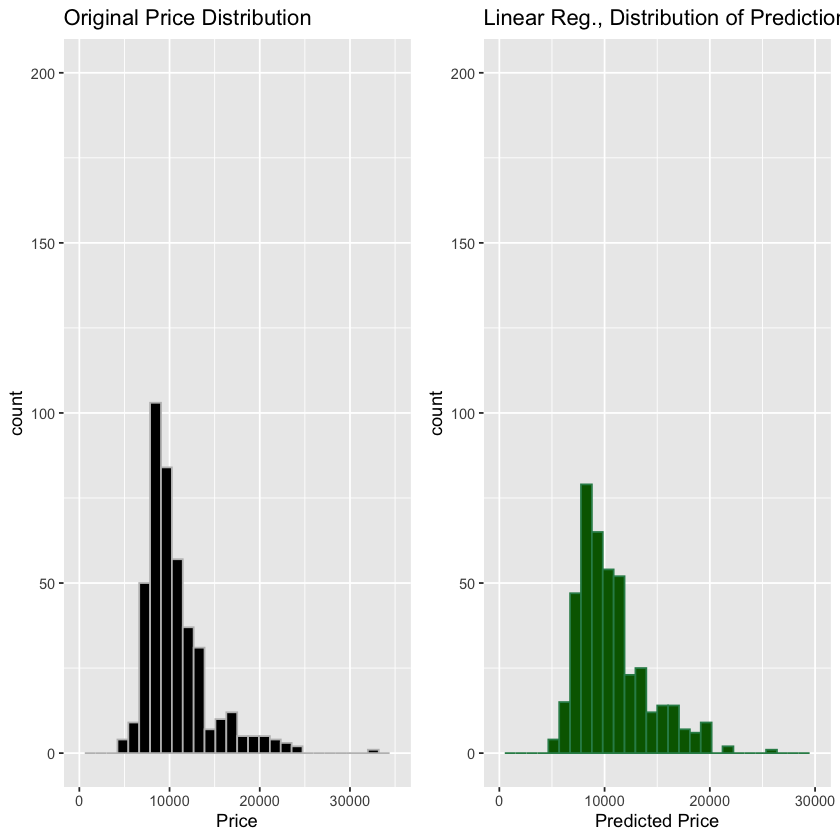

In [64]:
#compare to the actual price distribution
grid.arrange(price_dist, h_pred_lm, nrow = 1)

# Error metrics

Compute Prediction error:

In [65]:
lm_error <- lin_pred - test_set_lr$Price

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



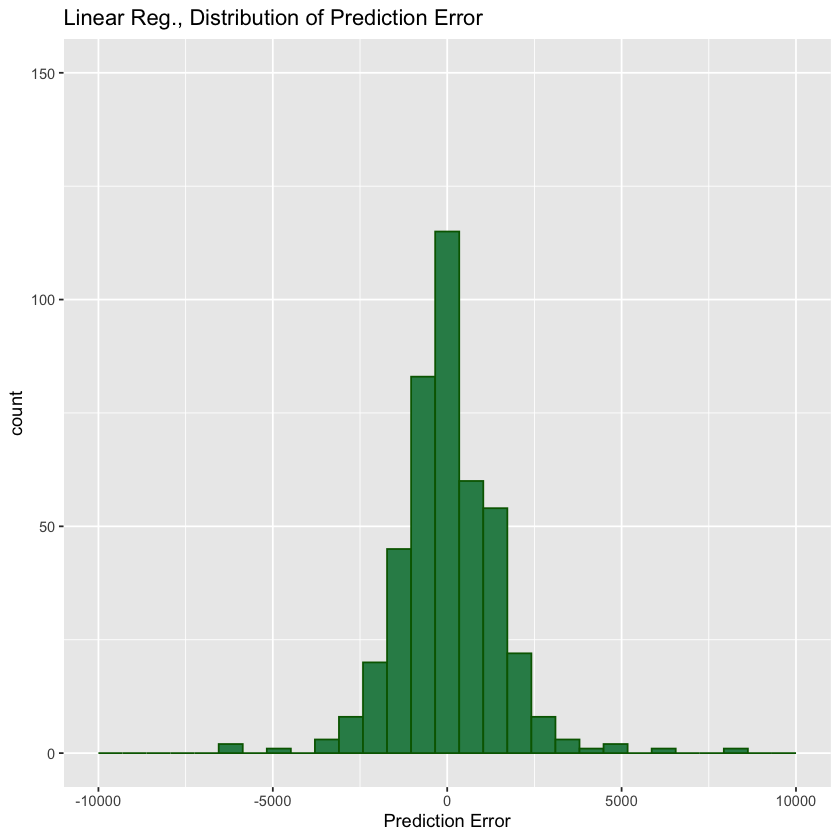

In [73]:
#Visualize the prediction error
#Histogram of the distribution of prediction errors
h_error_lm <- ggplot(data= test_set_lr, aes(x = lm_error)) + 
        geom_histogram(colour = "darkgreen", fill = "seagreen") +
        xlim (-10000, 10000) + 
        ylim (0, 150) + 
        ggtitle("Linear Reg., Distribution of Prediction Error") +
        labs(x = "Prediction Error")

h_error_lm

Warning message:
“Removed 3 rows containing missing values (geom_point).”


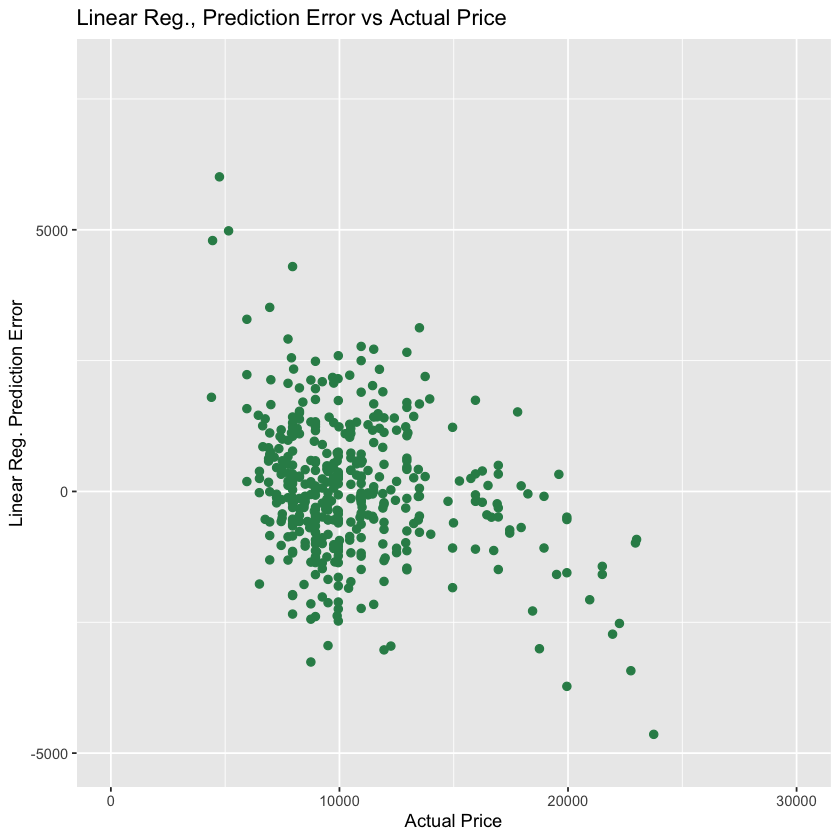

In [72]:
#Plot of the Prediction Error vs Actual Price
p_error_lm <- ggplot(data = test_set_lr, aes(x=Price, y=lm_error)) +
        geom_point(size=2, color = "seagreen") +
        ylim (-5000, 8000) +
        xlim (0, 30000) +
        ggtitle("Linear Reg., Prediction Error vs Actual Price") +
        labs(x = "Actual Price", y = "Linear Reg. Prediction Error")

p_error_lm

In [68]:
#Compute other metrics
#Mean error
ME_lin <- mean(lm_error)
#MAE
lin_MAE <- MAE(pred = lin_pred, obs = test_set_lr$Price)
#MAPE
lin_abs_relative_error <-abs(lm_error/test_set_lr$Price)
linMAPE <- mean(lin_abs_relative_error)*100
#RMSE
lin_RMSE <- RMSE(pred = lin_pred, obs = test_set_lr$Price)

#Put together the error metrics
res_lin<- c(ME_lin, lin_MAE, linMAPE, lin_RMSE)
names(res_lin) <-c("ME", "MAE", "MAPE", "RMSE")
res_lin <- set_label(res_lin, "Linear Regression")
res_lin

Linear Regression
        ME        MAE       MAPE       RMSE 
  15.06384 1014.49748   10.44887 1428.63522

# Comparing Different Models

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 2 rows containing missing values (geom_bar).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 2 rows containing missing values (geom_bar).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 2 rows containing missing values (geom_bar).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 2 rows containing missing values (geom_bar).”


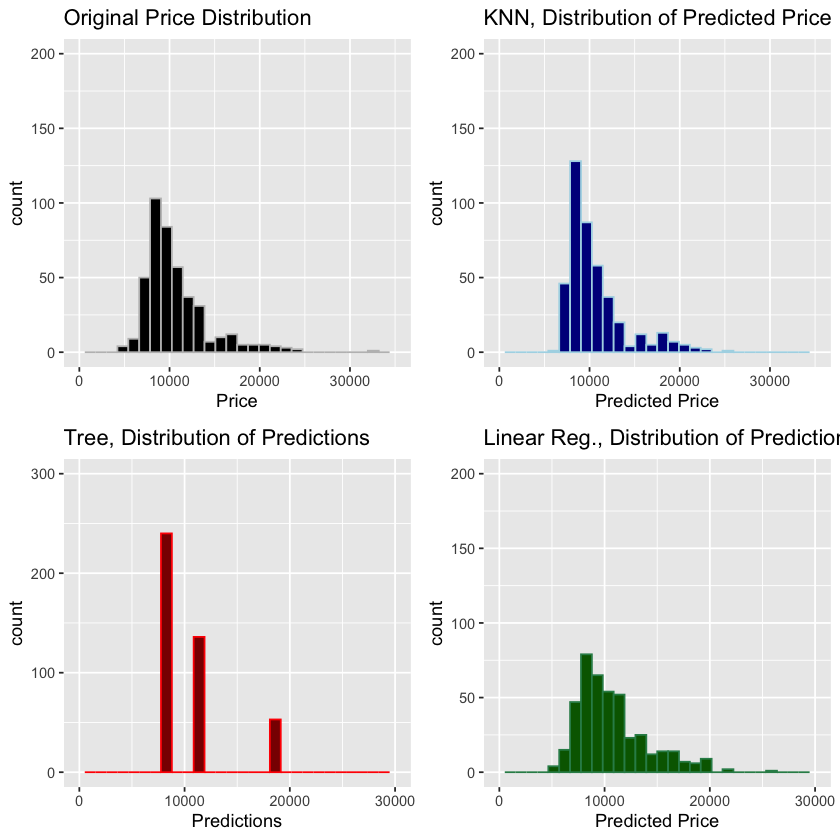

In [74]:
#Compare the distribution of original price with the distributions of predicted prices
grid.arrange(price_dist, h_pred_knn,h_pred_tree,h_pred_lm, nrow = 2)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 3 rows containing missing values (geom_point).”
Warning message:
“Removed 3 rows containing missing values (geom_point).”


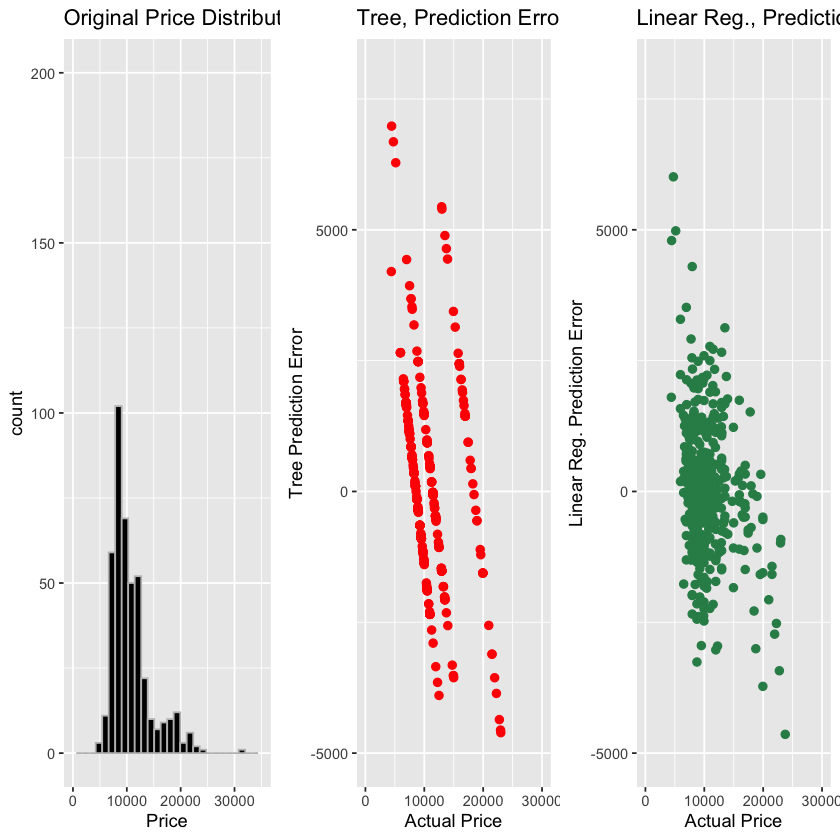

In [75]:
#Compare the scatterplots of the Prediction Error vs Actual Price
#for the three models
grid.arrange(p_error_knn,p_error_tree,p_error_lm, nrow = 1)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



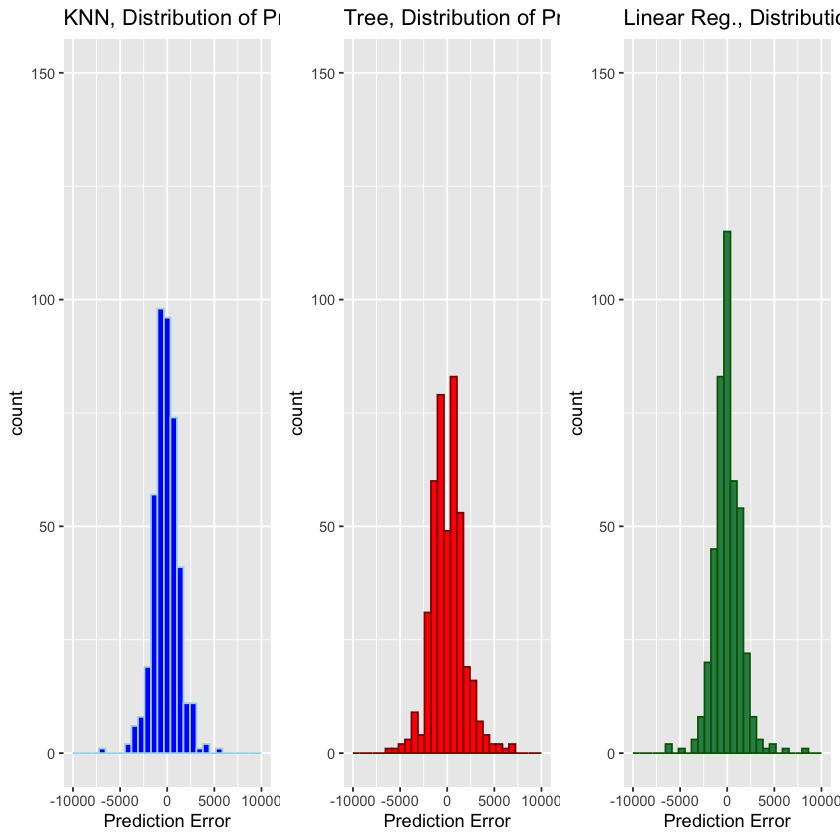

In [79]:
#Compare the histograms of the distribution of prediction errors
#for the three models
grid.arrange(h_error_knn,h_error_tree,h_error_lm, nrow = 1)

In [80]:
#Compare the error metrics
res_knn
res_tree
res_lin

KNN
        ME        MAE       MAPE       RMSE 
-103.48818  994.71295   10.12233 1390.95410

Regression Tree
        ME        MAE       MAPE       RMSE 
  19.87433 1338.76371   13.28735 1861.19783

Linear Regression
        ME        MAE       MAPE       RMSE 
  15.06384 1014.49748   10.44887 1428.63522